# **Experiment 3**



## Decision Trees


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import warnings
from matplotlib import pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# initializing lists for storing metrics and results

# models
model_names_list = []

# hyperpameters
max_depth_list = []
depth_list = []
min_samples_leaf_list = []
max_features_list = []
class_weights = []
criteria = []

# training metrics
training_accuracy_list = []
training_precision_list = []
training_recall_list = []
training_f1_list = []
training_f2_list = []
training_f3_list = []
training_f4_list = []
training_f10_list = []

# validation metrics
validation_accuracy_list = []
validation_precision_list = []
validation_recall_list = []
validation_f1_list = []
validation_f2_list = []
validation_f3_list = []
validation_f4_list = []
validation_f10_list = []

# generalization gain
accuracy_losses_list = []
precision_losses_list = []
recall_losses_list = []
f1_losses_list = []
f2_losses_list = []
f3_losses_list = []
f4_losses_list = []
f10_losses_list = []

# confusion matrices
cm_train_list = []
cm_val_list = []

In [ ]:
# ConfusionMatrixDisplay preferences
def configure_CM(cm_display, title):
  cm_display.ax_.set_xlabel("Target?")
  cm_display.ax_.set_ylabel("Buys")
  cm_display.ax_.set_xticklabels(["Yes", "No"])
  cm_display.ax_.set_yticklabels(["Yes", "No"])
  cm_display.ax_.set_title(title)

In [ ]:
# defining a function to generate an Extra Trees model and store results to lists
# this version of the function uses the selective featureset X2

def plant_tree(name, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features=None, max_leaf_nodes=None, class_weight='balanced', min_impurity_decrease=0.0):
  # instantiating model with specified hyperparameters
  model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, random_state=1917, class_weight=class_weight)
  # fitting model
  model.fit(X2_train, y_train)
  # training results
  preds_train = model.predict(X2_train)
  accuracy_train = accuracy_score(y_train, preds_train)
  precision_train = precision_score(y_train, preds_train, labels=[1, 0])
  recall_train = recall_score(y_train, preds_train, labels=[1, 0])
  f1_train = f1_score(y_train, preds_train, labels=[1, 0])
  f2_train = fbeta_score(y_train, preds_train, beta=2, labels=[1, 0])
  f3_train = fbeta_score(y_train, preds_train, beta=3, labels=[1, 0])
  f4_train = fbeta_score(y_train, preds_train, beta=4, labels=[1, 0])
  f10_train = fbeta_score(y_train, preds_train, beta=10, labels=[1, 0])

  # validation results
  preds_val = model.predict(X2_val)
  accuracy_val = accuracy_score(y_val, preds_val)
  precision_val = precision_score(y_val, preds_val, labels=[1, 0])
  recall_val = recall_score(y_val, preds_val, labels=[1, 0])
  f1_val = f1_score(y_val, preds_val, labels=[1, 0])
  f2_val = fbeta_score(y_val, preds_val, beta=2, labels=[1, 0])
  f3_val = fbeta_score(y_val, preds_val, beta=3, labels=[1, 0])
  f4_val = fbeta_score(y_val, preds_val, beta=4, labels=[1, 0])
  f10_val = fbeta_score(y_val, preds_val, beta=10, labels=[1, 0])

  # Generalization loss
  accuracy_loss = accuracy_train - accuracy_val
  precision_loss = precision_train - precision_val
  recall_loss = recall_train - recall_val
  f1_loss = f1_train - f1_val
  f2_loss = f2_train - f2_val
  f3_loss = f3_train - f2_val
  f4_loss = f4_train - f4_val
  f10_loss = f10_train - f10_val

  # Storing info in lists

  # appending parameters
  model_params = model.get_params
  model_names_list.append(name)
  max_depth_list.append(max_depth)
  depth_list.append(model.get_depth())
  min_samples_leaf_list.append(min_samples_leaf)
  max_features_list.append(max_features)
  class_weights.append(class_weight)
  criteria.append(criterion)

  # appending training metrics
  training_accuracy_list.append(accuracy_train)
  training_precision_list.append(precision_train)
  training_recall_list.append(recall_train)
  training_f1_list.append(f1_train)
  training_f2_list.append(f2_train)
  training_f3_list.append(f3_train)
  training_f4_list.append(f4_train)
  training_f10_list.append(f10_train)

  # appending validation metrics
  validation_accuracy_list.append(accuracy_val)
  validation_precision_list.append(precision_val)
  validation_recall_list.append(recall_val)
  validation_f1_list.append(f1_val)
  validation_f2_list.append(f2_val)
  validation_f3_list.append(f3_val)
  validation_f4_list.append(f4_val)
  validation_f10_list.append(f10_val)

  # appending generalization margins
  accuracy_losses_list.append(accuracy_loss)
  precision_losses_list.append(precision_loss)
  recall_losses_list.append(recall_loss)
  f1_losses_list.append(f1_loss)
  f2_losses_list.append(f2_loss)
  f3_losses_list.append(f3_loss)
  f4_losses_list.append(f4_loss)
  f10_losses_list.append(f10_loss)

  # Printing key measures
  print(f"Results for {name}")
  print("   On Training Data:")
  print("     Accuracy: %", (accuracy_train * 100).round(3))
  print("     Precision: %", (precision_train * 100).round(3))
  print("     Recall: %", (recall_train * 100).round(3))
  # print("     F1 Score: ", f1_train)
  # print("     F2 Score: ", f2_train)
  # print("     F3 Score: ", f3_train)
  print("     F4 Score: %", (f4_train * 100).round(3))
  print("     F10 Score: %", (f10_train * 100).round(3))
  print("   On Validation Data:")
  print("     Accuracy: %", (accuracy_val * 100).round(3))
  print("     Precision: %", (precision_val * 100).round(3))
  print("     Recall: %", (recall_val * 100).round(3))
  # print("     F1 Score: ", f1_val)
  # print("     F2 Score: ", f2_val)
  # print("     F3 Score: ", f3_val)
  print("     F4 Score: %", (f3_val * 100).round(3))
  print("     F10 Score: %", (f10_val * 100).round(3))
  print("")
  print("   Generalization Losses:")
  print("     Accuracy: %", (accuracy_loss * 100).round(3))
  print("     Precision: %", (precision_loss * 100).round(3))
  print("     Recall: %", (recall_loss * 100).round(3))
  # print(f"F1 Generalization Loss for {name}: ", f1_loss)
  print("     F4: %", (f4_loss * 100).round(3))
  print("     F10: %", (f10_loss * 100).round(3))
  print("")
  # Confusion Matrices
  cm_train = confusion_matrix(y_train, preds_train, labels=[1, 0])
  cm_val = confusion_matrix(y_val, preds_val, labels=[1, 0])
  cm_train_list.append(cm_train)
  cm_val_list.append(cm_val)

  print("   Confusion Matrices")
  print("")
  print("     Training:")
  print(cm_train)
  print("")
  print("     Validation:")
  print(cm_val)

  ConfusionMatrixDisplay.from_predictions(y_train, preds_train, labels=[1, 0])
  ConfusionMatrixDisplay.from_predictions(y_val, preds_val, labels=[1, 0])
  # return model
  return model

In [ ]:
# defining preferences for ConfusionMatrixDisplay

def configure_CM(cm_display, title):
  cm_display.ax_.set_xlabel("Target?")
  cm_display.ax_.set_ylabel("Buys")
  cm_display.ax_.set_xticklabels(["Yes", "No"])
  cm_display.ax_.set_yticklabels(["Yes", "No"])
  cm_display.ax_.set_title(title)

### 1.   Load Dataset

In [ ]:
file_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/df_1%20(1)"

In [ ]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [ ]:
df.describe()

,Unnamed: 0,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
count,131337.00000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,...,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,65668.00000,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,...,0.115390,0.187868,0.023383,0.062184,0.049057,0.007568,0.187350,0.396842,0.000442,0.415367
std,37913.87049,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,...,0.319493,0.390608,0.151116,0.241490,0.215988,0.086667,0.390194,0.489245,0.021010,0.492787
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32834.00000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65668.00000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98502.00000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,131336.00000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Unnamed: 0                 131337 non-null  int64
 1   Target                     131337 non-null  int64
 2   age_of_vehicle_years       131337 non-null  int64
 3   sched_serv_warr            131337 non-null  int64
 4   non_sched_serv_warr        131337 non-null  int64
 5   sched_serv_paid            131337 non-null  int64
 6   non_sched_serv_paid        131337 non-null  int64
 7   total_paid_services        131337 non-null  int64
 8   total_services             131337 non-null  int64
 9   mth_since_last_serv        131337 non-null  int64
 10  annualised_mileage         131337 non-null  int64
 11  num_dealers_visited        131337 non-null  int64
 12  num_serv_dealer_purchased  131337 non-null  int64
 13  car_model_model_1          131337 non-null  int64
 14  car_

In [ ]:
df.columns

Index(['Unnamed: 0', 'Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 3. Explore Target variable

In [ ]:
target = df['Target']

In [ ]:
target.describe()

count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [ ]:
target_counts = target.value_counts()
target_counts

Target
0    127816
1      3521
Name: count, dtype: int64

In [ ]:
target_imbalance = (target_counts[1] / target_counts[0]).round(2)
print(f"Target Imbalance: {target_imbalance} %")

Target Imbalance: 0.03 %


### 4. Explore Variables of Interest

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Defining a function to:
#   Calculate a response rate for each unique value in a column
#   Display a barchart showing response rates
#   Take as input: dataframe, column

def respond_and_chart(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # make and display barchart
  plt.bar(*zip(*RRs.items()))
  plt.xlabel(f"{col}")
  plt.ylabel('Response Rate')
  plt.title(f'Response Rate by {col}')
  plt.show()

  return RRs

Assess feature importances returned from experiment 2

examing response rate for variables with low feature importance in experiment 1

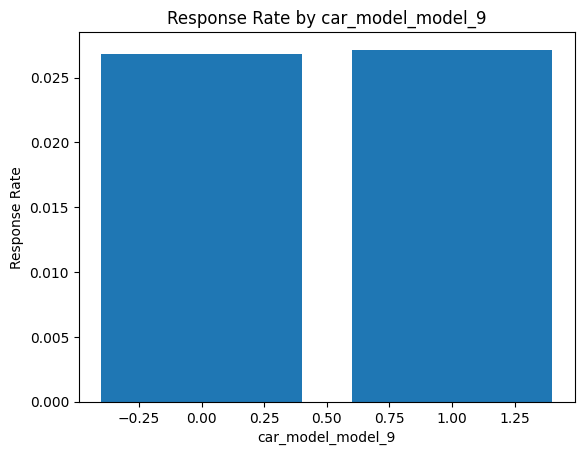

{0: 0.026806195959890443, 1: 0.02716297786720322}

In [ ]:
respond_and_chart(df, 'car_model_model_9', 'Target')

comparing with highest FIs

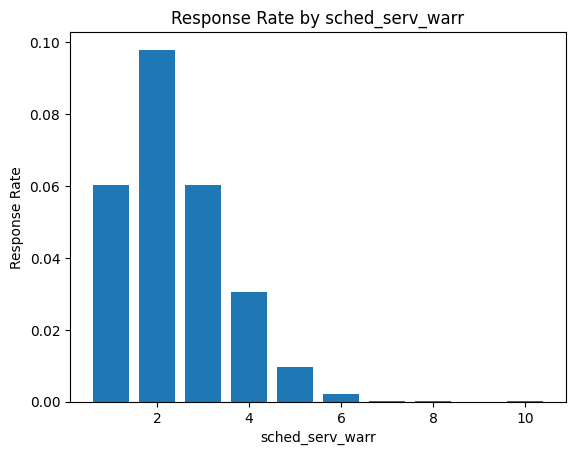

{2: 0.09798375398897592,
 10: 0.000154954675757341,
 8: 0.0001545833977430824,
 9: 0.0,
 4: 0.030543072587401934,
 1: 0.06029368140017799,
 3: 0.06020293122886133,
 7: 7.79058896852602e-05,
 5: 0.009565285014386811,
 6: 0.0020814061054579094}

In [ ]:
respond_and_chart(df, 'sched_serv_warr', 'Target')

In [ ]:
# iterate through cols to find the lowest and highest response rates
# the respond() function returns a dict, with unique values for the col as keys, and rrs as values
# goal is to find:
#   highest and lowest stdev's in rr (how predictive might the col be)
#   highest and lowest mean response rates, determined by summing RRs and dividing by number of unique values

# simplified version of respond without printing:
def respond(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # find RR stdev
  rr_values = list(RRs.values())
  stdev = np.std(rr_values)
  agg_rr = np.sum(rr_values)
  mean_rr = np.mean(rr_values)
  # add info to df
  # RR_df = pd.DataFrame({
  #     'Variable': [col],
  #     'Stdev': [stdev],
  #     'Mean': [mean_rr],
  #     'Aggregate': [agg_rr]
  # })
  return [col, stdev, mean_rr, agg_rr]

results = []

# call respond() for every col in df
for col in df.columns:
  results.append(respond(df, col, 'Target'))

results_df = pd.DataFrame(results, columns=['Variable', 'Stdev', 'Mean', 'Aggregate'])
results_df

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
1,Target,0.500000,0.500000,1.000000
2,age_of_vehicle_years,0.022659,0.026389,0.263886
3,sched_serv_warr,0.033278,0.026106,0.261058
4,non_sched_serv_warr,0.017314,0.026627,0.266266
5,sched_serv_paid,0.031654,0.026149,0.261489
6,non_sched_serv_paid,0.005360,0.026795,0.267946
7,total_paid_services,0.014883,0.026674,0.266735
8,total_services,0.032850,0.026126,0.261260
9,mth_since_last_serv,0.026203,0.026513,0.265129


In [ ]:
#results_df.drop(0, inplace=True)
results_df.drop(1, inplace=True)
rr_variance = results_df.sort_values('Stdev', ascending=False)
rr_agg = results_df.sort_values('Aggregate', ascending=False)
rr_mean = results_df.sort_values('Mean', ascending=False)

The table below shows us how much variance there is in the response rate for the values in a column. This is a proxy for the predictive power of the variable (how much response rate changes depending on the value). The lowest stdevs at the bottom of the table show variables whose values have near-identical response rates. These suggest predictors with less predictive power. We can note that the rankings here are similar to the rankings for Feature Importances from Experiment 1.

In [ ]:
rr_variance

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
3,sched_serv_warr,0.033278,0.026106,0.261058
8,total_services,0.032850,0.026126,0.261260
5,sched_serv_paid,0.031654,0.026149,0.261489
9,mth_since_last_serv,0.026203,0.026513,0.265129
2,age_of_vehicle_years,0.022659,0.026389,0.263886
4,non_sched_serv_warr,0.017314,0.026627,0.266266
10,annualised_mileage,0.015474,0.026688,0.266882
7,total_paid_services,0.014883,0.026674,0.266735
17,car_model_model_13,0.013982,0.040639,0.081279


The table below shows us the mean response rate for variables. This information is important, because we do want to bias our models towards capturing as many Positives (1s) as possible (i.e. maximizing Recall score). Variables may have low stdev in rr (meaning variable is not that helpful in classification) but have a relatively high response rate. Feature Importance and stdev rr might tempt us to drop these variables because of the low stdev, but this might perversely make it harder to capture Positives, so long as we instruct our models to weight Positives in proportion to their sparsity in the dataset.

In [ ]:
rr_mean

,Variable,Stdev,Mean,Aggregate
17,car_model_model_13,0.013982,0.040639,0.081279
22,car_model_model_18,0.011357,0.038148,0.076296
25,car_model_model_3,0.007044,0.032021,0.064043
29,car_model_model_7,0.005030,0.031213,0.062427
20,car_model_model_16,0.004143,0.030945,0.061889
30,car_model_model_8,0.003694,0.030141,0.060282
19,car_model_model_15,0.001570,0.028371,0.056741
32,car_segment_LCV,0.002134,0.028143,0.056286
33,car_segment_Large/SUV,0.002445,0.027313,0.054627
13,car_model_model_1,0.000258,0.027007,0.054014


importing Feature Importances from experiment 1

In [ ]:
fi_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(fi_url)
FIs

,Unnamed: 0,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,0,sched_serv_warr,19.52,19.42,19.42,19.45
1,1,total_services,16.93,18.37,18.37,17.89
2,2,sched_serv_paid,16.61,16.57,16.57,16.58
3,3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,5,annualised_mileage,7.58,7.24,7.24,7.35
6,6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,7,total_paid_services,2.79,2.59,2.59,2.66
8,8,num_dealers_visited,2.75,2.54,2.54,2.61
9,9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


### 5. Prepare Data

In [ ]:
df_clean = df.drop('Unnamed: 0', axis=1)

In [ ]:
df_clean.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 6. Split Dataset

importing splits from experiment 1

In [ ]:
X_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_train_1"
X_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_val_1"
X_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_test_1"

y_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_train_1"
y_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_val_1"
y_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_test_1"

X_train = pd.read_csv(X_train_url)
X_val = pd.read_csv(X_val_url)
X_test = pd.read_csv(X_test_url)

y_train = pd.read_csv(y_train_url)
y_val = pd.read_csv(y_val_url)
y_test = pd.read_csv(y_test_url)

In [ ]:
datasets = [X_train, X_val, X_test, y_train, y_val, y_test]

# restoring original indices

for dataset in datasets:
  dataset.set_index('Unnamed: 0', inplace=True, verify_integrity=True)
  print(dataset.columns)
  print("")

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'car_model_model_1',
       'car_model_model_10', 'car_model_model_11', 'car_model_model_12',
       'car_model_model_13', 'car_model_model_14', 'car_model_model_15',
       'car_model_model_16', 'car_model_model_17', 'car_model_model_18',
       'car_model_model_19', 'car_model_model_2', 'car_model_model_3',
       'car_model_model_4', 'car_model_model_5', 'car_model_model_6',
       'car_model_model_7', 'car_model_model_8', 'car_model_model_9',
       'car_segment_LCV', 'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',

In [ ]:
for dataset in datasets:
  dataset.index.rename("Index", inplace=True)
  print(dataset.head().index)
  print(dataset.tail().index)
  print("")

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')



In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0         81801
1          2254
Name: count, dtype: int64
Target
0         20451
1           563
Name: count, dtype: int64
Target
0         25564
1           704
Name: count, dtype: int64


In [ ]:
# import feature importances from experiment 1 to refine X

FI_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(FI_url)
FIs.drop('Unnamed: 0', axis=1, inplace=True)
FIs.head(20)

,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,sched_serv_warr,19.52,19.42,19.42,19.45
1,total_services,16.93,18.37,18.37,17.89
2,sched_serv_paid,16.61,16.57,16.57,16.58
3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,annualised_mileage,7.58,7.24,7.24,7.35
6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,total_paid_services,2.79,2.59,2.59,2.66
8,num_dealers_visited,2.75,2.54,2.54,2.61
9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


In [ ]:
imp_feats = FIs['Feature'].iloc[0:11]
imp_feats.values

array(['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid'], dtype=object)

In [ ]:
X_list = [X_train, X_val, X_test]
for X in X_list:
  for col in X:
    if col not in imp_feats.values:
      X = X.drop(col, axis=1)

In [ ]:
X2_train = X_train[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_val = X_val[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_test = X_test[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

In [ ]:
X2_train

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
62240,6,7,9,6,10,4,8,10,10,7,10
57864,7,7,7,9,5,6,8,4,3,8,4
108896,10,9,10,3,8,9,7,9,8,9,6
19747,10,10,10,5,7,10,10,10,10,4,9
58454,9,9,9,4,8,9,9,6,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...
21568,10,10,10,4,10,10,10,10,10,5,10
121526,4,2,5,8,6,4,3,3,3,2,3
99055,1,1,1,1,1,1,2,2,2,2,2


In [ ]:
X2_val

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
78749,4,3,4,3,2,5,4,6,8,5,7
124225,3,6,5,9,9,7,8,5,9,4,6
89057,10,8,10,8,7,9,6,10,9,5,9
117989,6,7,7,9,5,6,8,10,7,9,10
33437,8,9,9,6,10,9,9,8,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...
97691,5,5,7,5,4,8,6,9,6,7,9
81229,10,10,10,3,7,10,7,9,5,10,8
6043,5,5,9,10,10,7,5,6,6,3,4


In [ ]:
X2_test

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
20850,7,10,5,6,6,10,10,8,9,10,9
119184,10,8,8,3,5,9,2,5,8,9,2
33941,10,7,8,4,6,10,2,5,3,2,3
39776,4,4,3,4,3,4,4,3,7,5,4
14297,1,1,2,1,4,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
69096,5,6,7,5,5,7,7,10,4,7,10
68154,6,7,5,6,8,7,9,9,10,8,10
18628,7,9,8,6,5,8,10,10,3,2,10


### 7. Baseline Model

In [ ]:
base_train = np.full(y_train.shape, 0)
base_val = np.full(y_val.shape, 0)

In [ ]:
train_perf = y_train
valid_perf = y_val
test_perf = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

Training results: 

Accuracy of Baseline Model:  0.9731842246148356
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0  2254]
 [    0 81801]]

Validation Results: 

Accuracy of Baseline Model:  0.9732083372989435
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0   563]
 [    0 20451]]


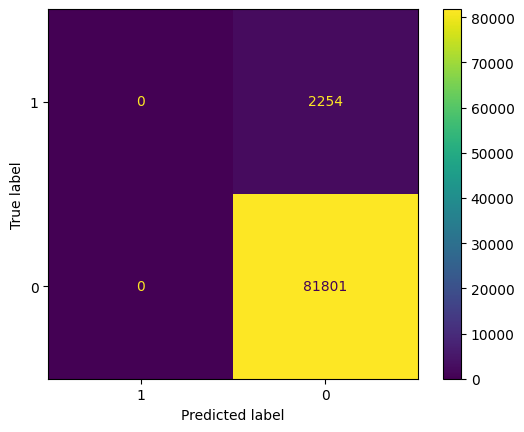

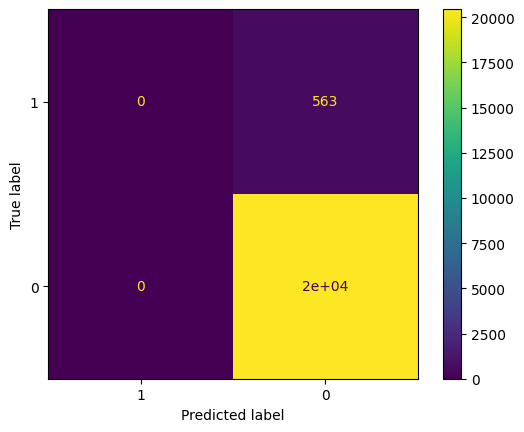

In [ ]:
print("Training results: ")
print("")

accuracy_base_train = accuracy_score(y_train, base_train)
print("Accuracy of Baseline Model: ", accuracy_base_train)

precision_base_train = precision_score(y_train, base_train, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_train)

recall_base_train = recall_score(y_train, base_train, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_train)

f1_base_train = f1_score(y_train, base_train, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_train)

f2_base_train = fbeta_score(y_train, base_train, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_train)

f3_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_train)

f4_base_train = fbeta_score(y_train, base_train, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_train)

f10_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F10 Score of Baseline Model: ", f3_base_train)

cm_base_train = confusion_matrix(y_train, base_train, labels=[1, 0])
print(cm_base_train)

print("")
print("Validation Results: ")
print("")
accuracy_base_val = accuracy_score(y_val, base_val)
print("Accuracy of Baseline Model: ", accuracy_base_val)

precision_base_val = precision_score(y_val, base_val, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_val)

recall_base_val = recall_score(y_val, base_val, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_val)

f1_base_val = f1_score(y_val, base_val, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_val)

f2_base_val = fbeta_score(y_val, base_val, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_val)

f3_base_val = fbeta_score(y_val, base_val, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_val)

f4_base_val = fbeta_score(y_val, base_val, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_val)

f10_base_val = fbeta_score(y_val, base_val, beta=10, labels=[1,0])
print("F10 Score of Baseline Model: ", f10_base_val)

cm_base_val = confusion_matrix(y_val, base_val, labels=[1, 0])
print(cm_base_val)

accuracy_base_loss = accuracy_base_train - accuracy_base_val
precision_base_loss = precision_base_train - precision_base_val
recall_base_loss = recall_base_train - recall_base_val
f1_base_loss = f1_base_train - f1_base_val
f2_base_loss = f2_base_train - f2_base_val
f3_base_loss = f3_base_train - f3_base_val
f4_base_loss = f4_base_train - f4_base_val
f10_base_loss = f10_base_train - f10_base_val

model_names_list.append("Baseline")

max_depth_list.append(None)
depth_list.append(None)
min_samples_leaf_list.append(None)
max_features_list.append(None)
class_weights.append(None)

training_accuracy_list.append(accuracy_base_train)
training_precision_list.append(precision_base_train)
training_recall_list.append(recall_base_train)
training_f1_list.append(f1_base_train)
training_f2_list.append(f2_base_train)
training_f3_list.append(f3_base_train)
training_f4_list.append(f4_base_train)
training_f10_list.append(f10_base_train)

validation_accuracy_list.append(accuracy_base_val)
validation_precision_list.append(precision_base_val)
validation_recall_list.append(recall_base_val)
validation_f1_list.append(f1_base_val)
validation_f2_list.append(f2_base_val)
validation_f3_list.append(f3_base_val)
validation_f4_list.append(f4_base_val)
validation_f10_list.append(f10_base_val)

accuracy_losses_list.append(accuracy_base_loss)
precision_losses_list.append(precision_base_loss)
recall_losses_list.append(recall_base_loss)
f1_losses_list.append(f1_base_loss)
f2_losses_list.append(f2_base_loss)
f3_losses_list.append(f3_base_loss)
f4_losses_list.append(f4_base_loss)
f10_losses_list.append(f10_base_loss)

cm_train_list.append(cm_base_train)
cm_val_list.append(cm_base_val)

ConfusionMatrixDisplay.from_predictions(y_train, base_train, labels=[1, 0])
ConfusionMatrixDisplay.from_predictions(y_val, base_val, labels=[1, 0])

### 8. Train Decision Tree Models

tree_def: default parameters

Results for tree_def
   On Training Data:
     Accuracy: % 99.995
     Precision: % 100.0
     Recall: % 99.823
     F4 Score: % 99.833
     F10 Score: % 99.824
   On Validation Data:
     Accuracy: % 98.72
     Precision: % 75.345
     Recall: % 77.62
     F4 Score: % 77.386
     F10 Score: % 77.597

   Generalization Losses:
     Accuracy: % 1.275
     Precision: % 24.655
     Recall: % 22.203
     F4: % 22.351
     F10: % 22.228

   Confusion Matrices

     Training:
[[ 2250     4]
 [    0 81801]]

     Validation:
[[  437   126]
 [  143 20308]]


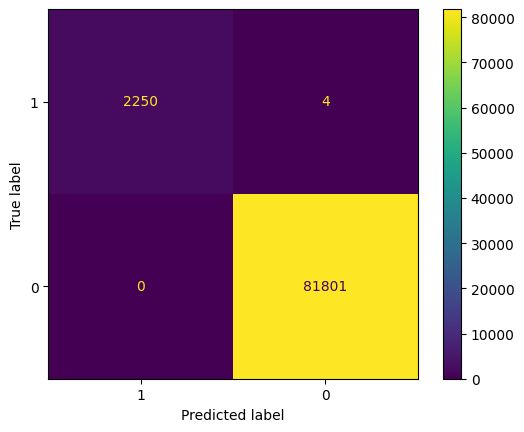

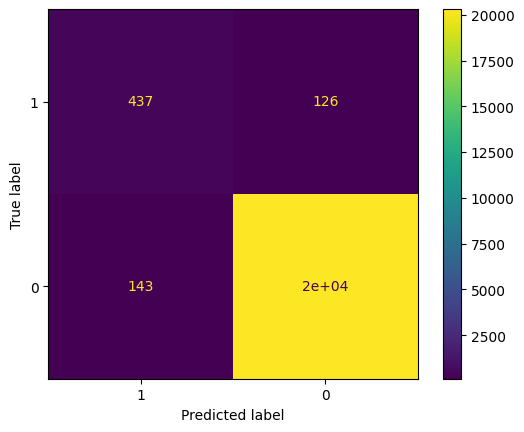

In [ ]:
tree_def = plant_tree("tree_def", class_weight=None)

Results for balanced_tree
   On Training Data:
     Accuracy: % 99.993
     Precision: % 99.735
     Recall: % 100.0
     F4 Score: % 99.984
     F10 Score: % 99.997
   On Validation Data:
     Accuracy: % 98.763
     Precision: % 79.191
     Recall: % 73.002
     F4 Score: % 73.577
     F10 Score: % 73.058

   Generalization Losses:
     Accuracy: % 1.23
     Precision: % 20.544
     Recall: % 26.998
     F4: % 26.645
     F10: % 26.939

   Confusion Matrices

     Training:
[[ 2254     0]
 [    6 81795]]

     Validation:
[[  411   152]
 [  108 20343]]


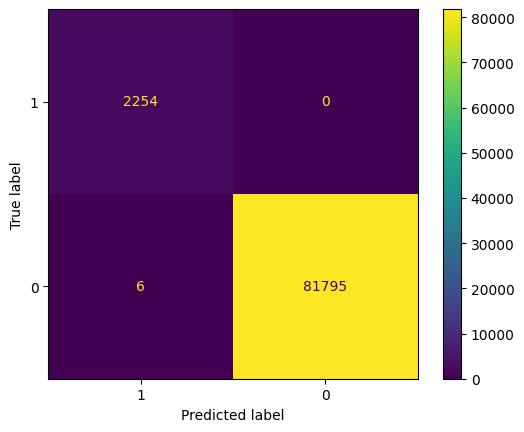

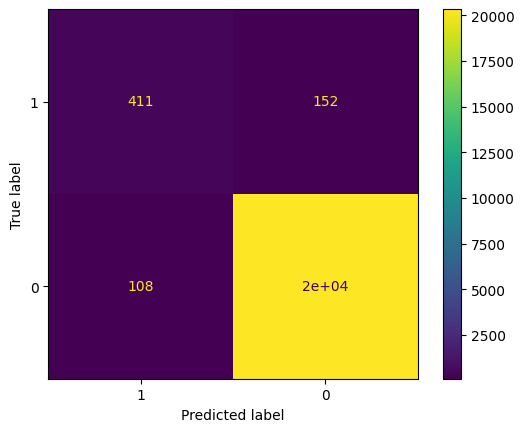

In [ ]:
balanced_tree = plant_tree("balanced_tree")

tree1: borrowing parameters from experiment 1, roughly in line with rf_gs

Results for tree1
   On Training Data:
     Accuracy: % 98.668
     Precision: % 66.805
     Recall: % 100.0
     F4 Score: % 97.16
     F10 Score: % 99.51
   On Validation Data:
     Accuracy: % 98.006
     Precision: % 58.759
     Recall: % 85.79
     F4 Score: % 82.017
     F10 Score: % 85.401

   Generalization Losses:
     Accuracy: % 0.661
     Precision: % 8.046
     Recall: % 14.21
     F4: % 13.63
     F10: % 14.109

   Confusion Matrices

     Training:
[[ 2254     0]
 [ 1120 80681]]

     Validation:
[[  483    80]
 [  339 20112]]


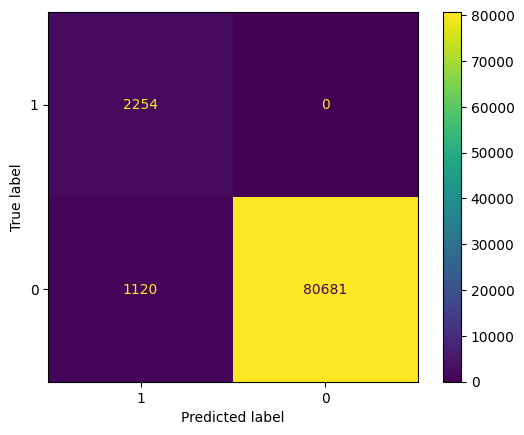

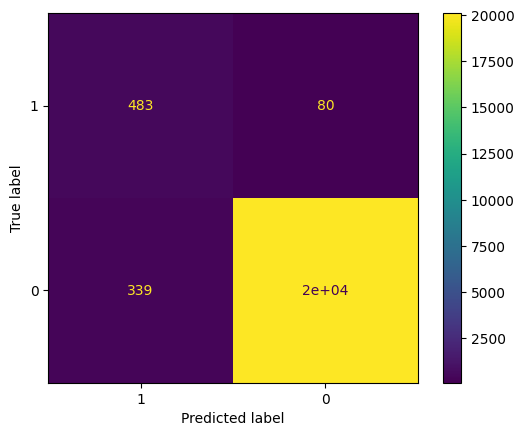

In [ ]:
tree1 = plant_tree("tree1", min_samples_leaf=5, criterion='entropy')

Results for tree1_gini
   On Training Data:
     Accuracy: % 98.631
     Precision: % 66.197
     Recall: % 100.0
     F4 Score: % 97.084
     F10 Score: % 99.497
   On Validation Data:
     Accuracy: % 97.93
     Precision: % 57.729
     Recall: % 84.902
     F4 Score: % 81.086
     F10 Score: % 84.508

   Generalization Losses:
     Accuracy: % 0.701
     Precision: % 8.467
     Recall: % 15.098
     F4: % 14.469
     F10: % 14.988

   Confusion Matrices

     Training:
[[ 2254     0]
 [ 1151 80650]]

     Validation:
[[  478    85]
 [  350 20101]]


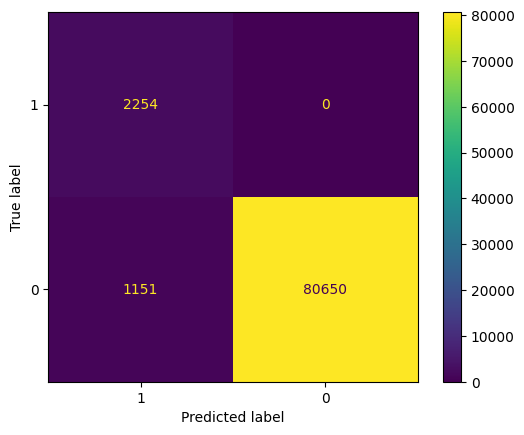

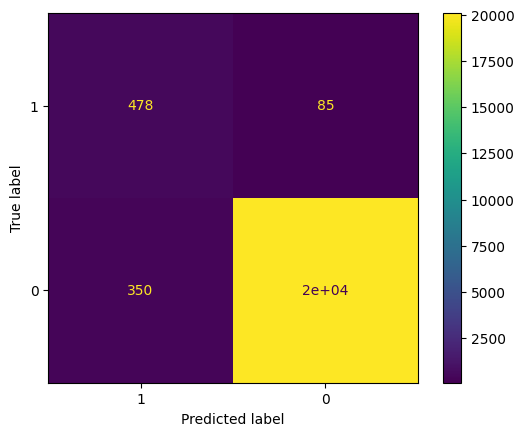

In [ ]:
tree1_gini = plant_tree("tree1_gini", min_samples_leaf=5, criterion='gini')

Results for tree1a
   On Training Data:
     Accuracy: % 97.32
     Precision: % 50.011
     Recall: % 100.0
     F4 Score: % 94.447
     F10 Score: % 99.02
   On Validation Data:
     Accuracy: % 96.812
     Precision: % 45.141
     Recall: % 88.277
     F4 Score: % 80.577
     F10 Score: % 87.45

   Generalization Losses:
     Accuracy: % 0.508
     Precision: % 4.87
     Recall: % 11.723
     F4: % 10.868
     F10: % 11.57

   Confusion Matrices

     Training:
[[ 2254     0]
 [ 2253 79548]]

     Validation:
[[  497    66]
 [  604 19847]]


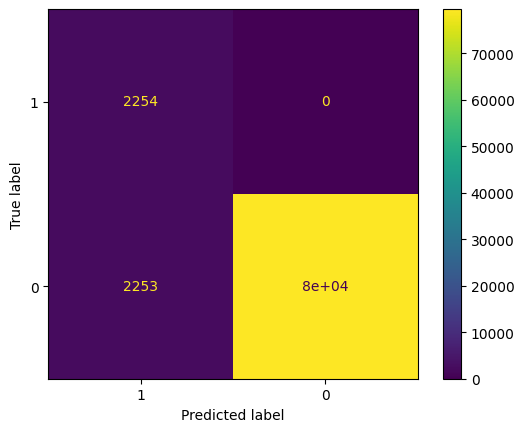

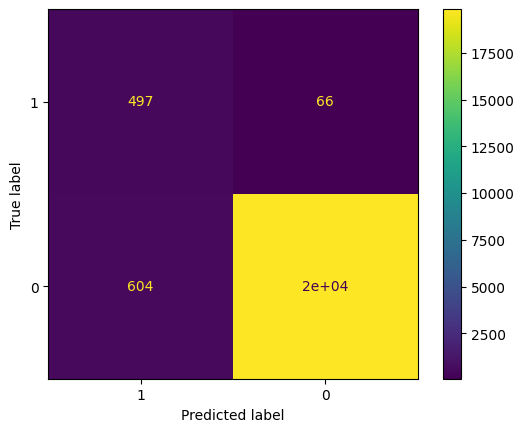

In [ ]:
tree1a = plant_tree("tree1a", min_samples_leaf=10)

Results for tree1b
   On Training Data:
     Accuracy: % 95.251
     Precision: % 36.074
     Recall: % 99.867
     F4 Score: % 90.457
     F10 Score: % 98.148
   On Validation Data:
     Accuracy: % 94.794
     Precision: % 33.143
     Recall: % 92.718
     F4 Score: % 78.591
     F10 Score: % 91.096

   Generalization Losses:
     Accuracy: % 0.457
     Precision: % 2.931
     Recall: % 7.149
     F4: % 6.606
     F10: % 7.052

   Confusion Matrices

     Training:
[[ 2251     3]
 [ 3989 77812]]

     Validation:
[[  522    41]
 [ 1053 19398]]


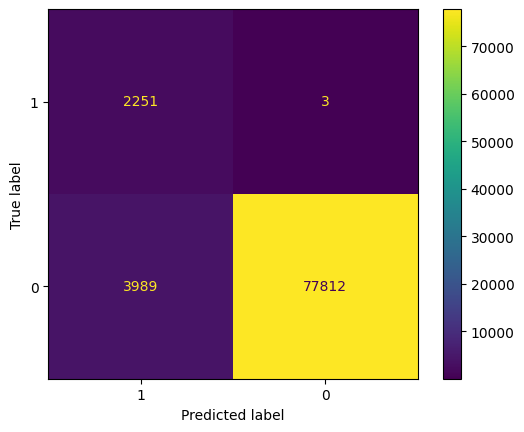

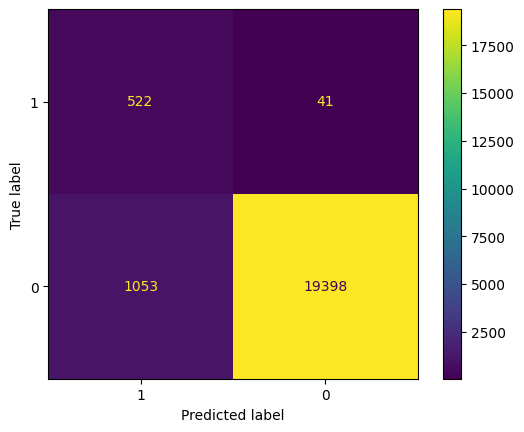

In [ ]:
tree1b = plant_tree("tree1b", min_samples_leaf=20)

In [ ]:
tree1b.get_depth()

18

Results for tree1c
   On Training Data:
     Accuracy: % 93.816
     Precision: % 30.092
     Recall: % 98.713
     F4 Score: % 87.038
     F10 Score: % 96.534
   On Validation Data:
     Accuracy: % 93.561
     Precision: % 28.439
     Recall: % 92.54
     F4 Score: % 75.518
     F10 Score: % 90.52

   Generalization Losses:
     Accuracy: % 0.255
     Precision: % 1.653
     Recall: % 6.173
     F4: % 5.331
     F10: % 6.014

   Confusion Matrices

     Training:
[[ 2225    29]
 [ 5169 76632]]

     Validation:
[[  521    42]
 [ 1311 19140]]


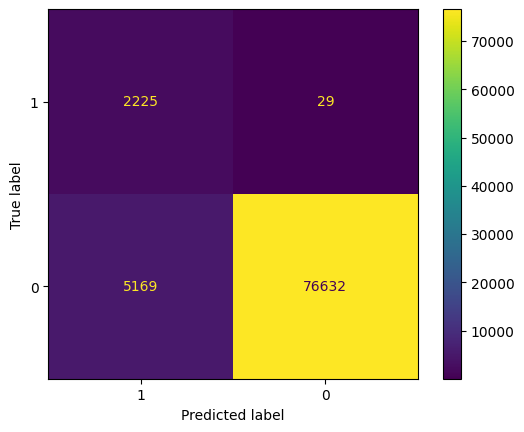

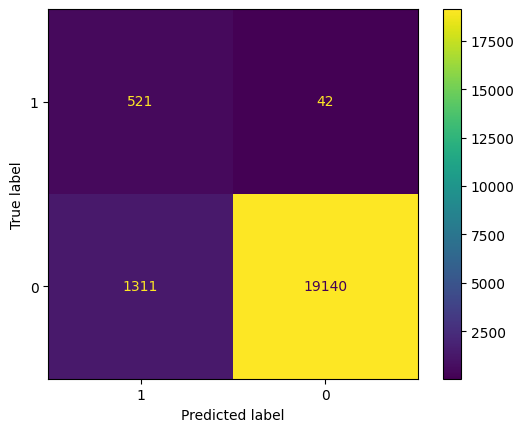

In [ ]:
tree1c = plant_tree("tree1c", min_samples_leaf=50)

Results for tree1d
   On Training Data:
     Accuracy: % 96.323
     Precision: % 42.17
     Recall: % 100.0
     F4 Score: % 92.535
     F10 Score: % 98.66
   On Validation Data:
     Accuracy: % 95.746
     Precision: % 37.768
     Recall: % 90.764
     F4 Score: % 79.595
     F10 Score: % 89.52

   Generalization Losses:
     Accuracy: % 0.577
     Precision: % 4.402
     Recall: % 9.236
     F4: % 8.692
     F10: % 9.14

   Confusion Matrices

     Training:
[[ 2254     0]
 [ 3091 78710]]

     Validation:
[[  511    52]
 [  842 19609]]


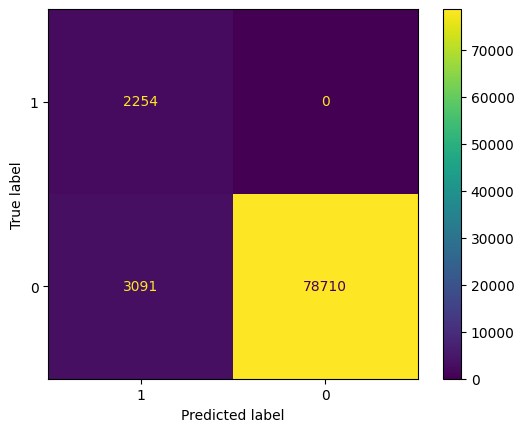

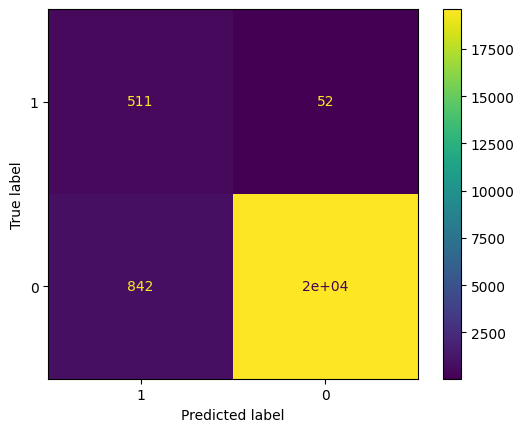

In [ ]:
tree1d = plant_tree("tree1d", min_samples_leaf=15)

Results for tree1e
   On Training Data:
     Accuracy: % 94.53
     Precision: % 32.8
     Recall: % 99.157
     F4 Score: % 88.612
     F10 Score: % 97.21
   On Validation Data:
     Accuracy: % 94.033
     Precision: % 30.268
     Recall: % 94.139
     F4 Score: % 77.735
     F10 Score: % 92.212

   Generalization Losses:
     Accuracy: % 0.497
     Precision: % 2.532
     Recall: % 5.019
     F4: % 4.868
     F10: % 4.998

   Confusion Matrices

     Training:
[[ 2235    19]
 [ 4579 77222]]

     Validation:
[[  530    33]
 [ 1221 19230]]


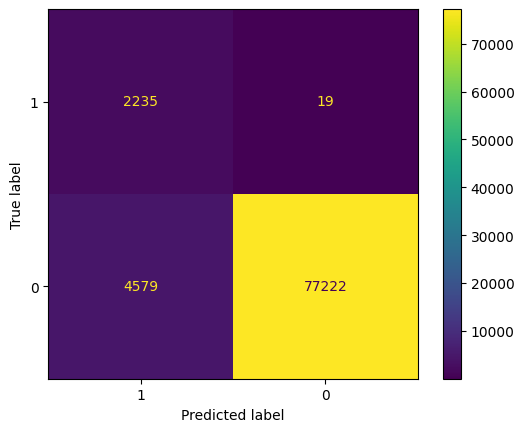

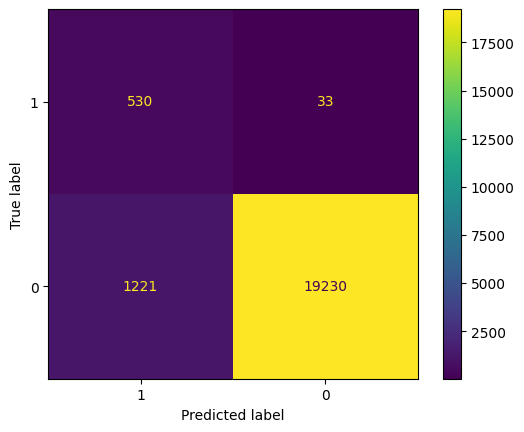

In [ ]:
tree1e = plant_tree("tree1e", min_samples_leaf=35)

tree2: taking tree1b's parameters and adjusting max_depth

Results for tree2
   On Training Data:
     Accuracy: % 87.273
     Precision: % 16.917
     Recall: % 95.785
     F4 Score: % 75.171
     F10 Score: % 91.559
   On Validation Data:
     Accuracy: % 86.904
     Precision: % 16.457
     Recall: % 95.382
     F4 Score: % 64.466
     F10 Score: % 91.058

   Generalization Losses:
     Accuracy: % 0.369
     Precision: % 0.46
     Recall: % 0.403
     F4: % 0.776
     F10: % 0.501

   Confusion Matrices

     Training:
[[ 2159    95]
 [10603 71198]]

     Validation:
[[  537    26]
 [ 2726 17725]]


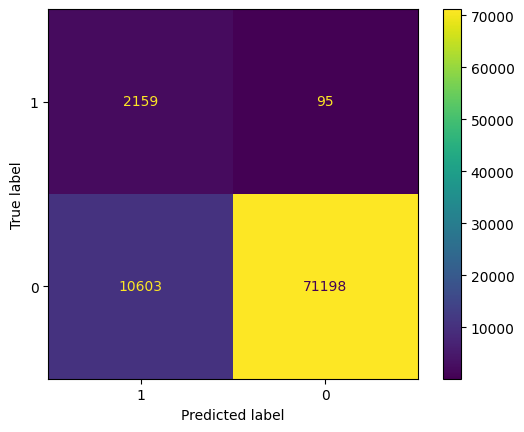

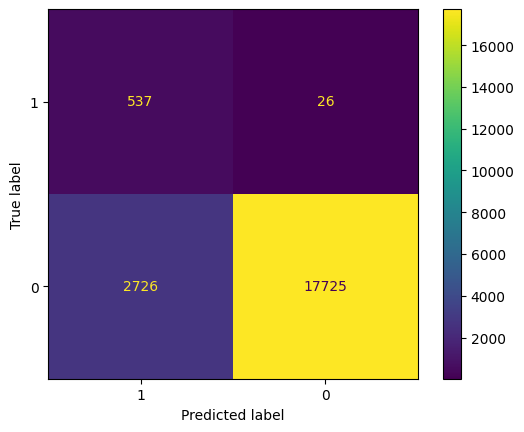

In [ ]:
tree2 = plant_tree("tree2", max_depth=5, min_samples_leaf=20)

Results for tree2a
   On Training Data:
     Accuracy: % 94.222
     Precision: % 31.505
     Recall: % 98.358
     F4 Score: % 87.443
     F10 Score: % 96.334
   On Validation Data:
     Accuracy: % 94.052
     Precision: % 30.405
     Recall: % 94.671
     F4 Score: % 78.152
     F10 Score: % 92.731

   Generalization Losses:
     Accuracy: % 0.17
     Precision: % 1.1
     Recall: % 3.687
     F4: % 3.241
     F10: % 3.604

   Confusion Matrices

     Training:
[[ 2217    37]
 [ 4820 76981]]

     Validation:
[[  533    30]
 [ 1220 19231]]


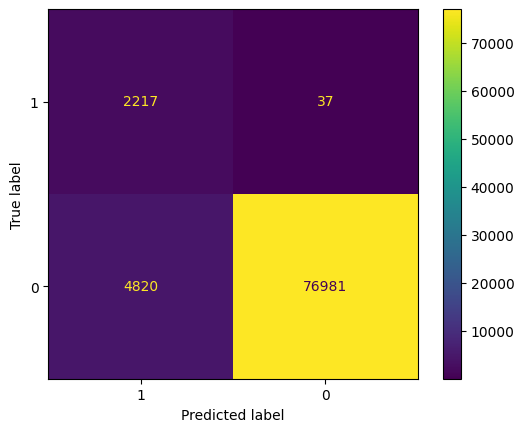

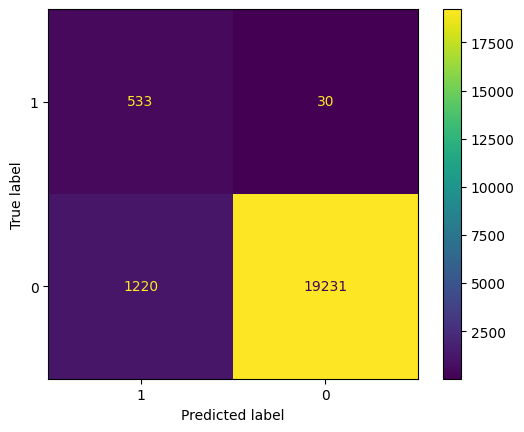

In [ ]:
tree2a = plant_tree("tree2a", max_depth=10, min_samples_leaf=20)

Results for tree2b
   On Training Data:
     Accuracy: % 95.16
     Precision: % 35.617
     Recall: % 99.645
     F4 Score: % 90.116
     F10 Score: % 97.903
   On Validation Data:
     Accuracy: % 94.732
     Precision: % 32.915
     Recall: % 93.073
     F4 Score: % 78.69
     F10 Score: % 91.419

   Generalization Losses:
     Accuracy: % 0.428
     Precision: % 2.702
     Recall: % 6.572
     F4: % 6.078
     F10: % 6.484

   Confusion Matrices

     Training:
[[ 2246     8]
 [ 4060 77741]]

     Validation:
[[  524    39]
 [ 1068 19383]]


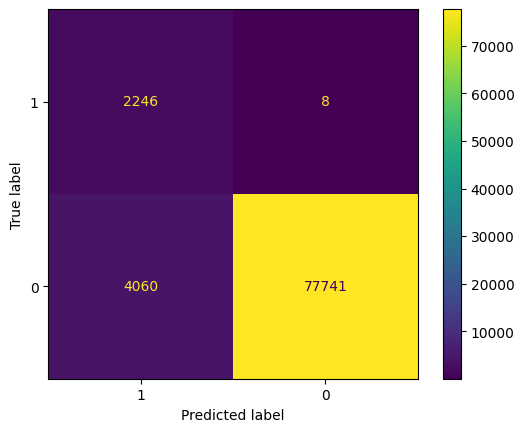

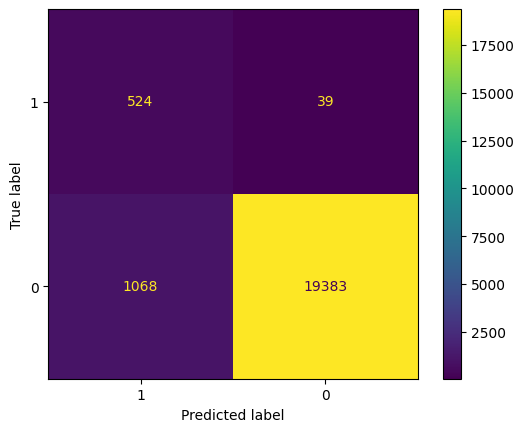

In [ ]:
tree2b = plant_tree("tree2b", max_depth=15, min_samples_leaf=20)

Results for tree2c
   On Training Data:
     Accuracy: % 89.377
     Precision: % 18.529
     Recall: % 87.178
     F4 Score: % 71.579
     F10 Score: % 84.094
   On Validation Data:
     Accuracy: % 88.95
     Precision: % 17.534
     Recall: % 84.369
     F4 Score: % 61.085
     F10 Score: % 81.301

   Generalization Losses:
     Accuracy: % 0.427
     Precision: % 0.995
     Recall: % 2.809
     F4: % 2.662
     F10: % 2.792

   Confusion Matrices

     Training:
[[ 1965   289]
 [ 8640 73161]]

     Validation:
[[  475    88]
 [ 2234 18217]]


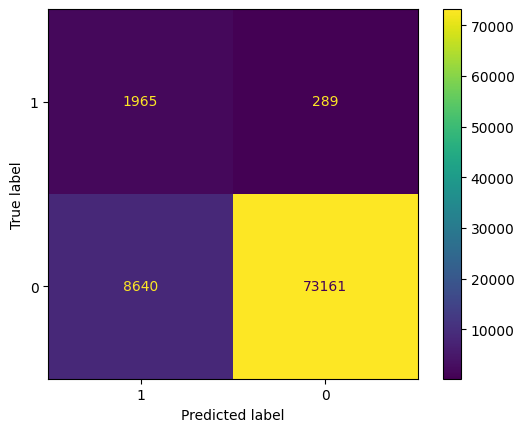

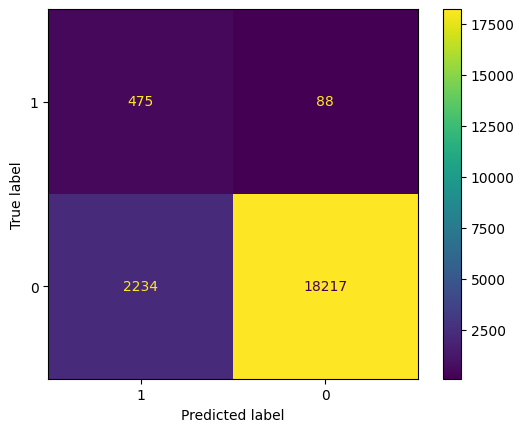

In [ ]:
tree2c = plant_tree("tree2c", max_depth=4, min_samples_leaf=20)

tree3: tree2 params with random splitter

Results for tree3
   On Training Data:
     Accuracy: % 78.915
     Precision: % 10.915
     Recall: % 95.83
     F4 Score: % 65.744
     F10 Score: % 88.976
   On Validation Data:
     Accuracy: % 78.5
     Precision: % 10.521
     Recall: % 93.606
     F4 Score: % 52.303
     F10 Score: % 86.818

   Generalization Losses:
     Accuracy: % 0.415
     Precision: % 0.394
     Recall: % 2.224
     F4: % 1.829
     F10: % 2.159

   Confusion Matrices

     Training:
[[ 2160    94]
 [17629 64172]]

     Validation:
[[  527    36]
 [ 4482 15969]]


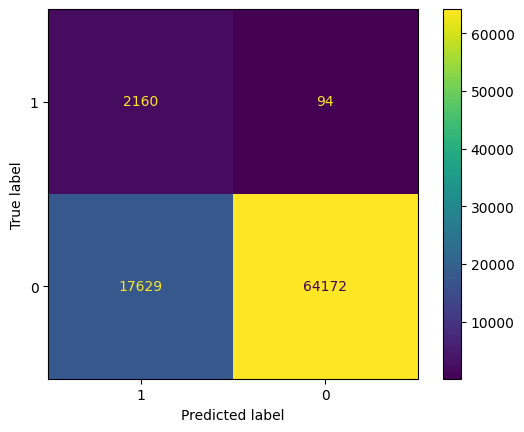

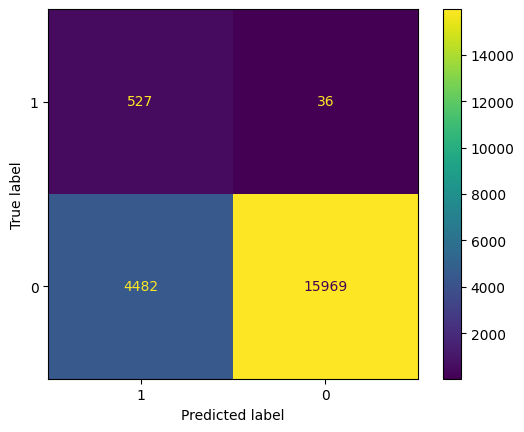

In [ ]:
tree3 = plant_tree("tree3", splitter='random', max_depth=5, min_samples_leaf=20)

Using GridSearch to optimize min_samples_leaf and max_depth parameters, scoring by F10

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

f10_score = make_scorer(fbeta_score, beta=10)

F10_opt_grid = {
    'max_depth': np.arange(6, 12, 1),
    'min_samples_leaf': np.arange(20, 35, 1)
}

DT_pref = DecisionTreeClassifier(class_weight='balanced')
DT_F10_opt = GridSearchCV(DT_pref, F10_opt_grid, scoring=f10_score, verbose=1)
DT_F10_opt.fit(X2_train, y_train)
DT_F10_opt.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

On first run, GS returns F10 optimal params as:

{'max_depth': 11, 'min_samples_leaf': 30}

On second run (more reliable):

{'max_depth': 11, 'min_samples_leaf': 31}

Results for tree_f10_opt
   On Training Data:
     Accuracy: % 94.057
     Precision: % 30.931
     Recall: % 98.625
     F4 Score: % 87.376
     F10 Score: % 96.533
   On Validation Data:
     Accuracy: % 93.752
     Precision: % 29.327
     Recall: % 94.494
     F4 Score: % 77.314
     F10 Score: % 92.46

   Generalization Losses:
     Accuracy: % 0.306
     Precision: % 1.603
     Recall: % 4.131
     F4: % 3.806
     F10: % 4.073

   Confusion Matrices

     Training:
[[ 2223    31]
 [ 4964 76837]]

     Validation:
[[  532    31]
 [ 1282 19169]]


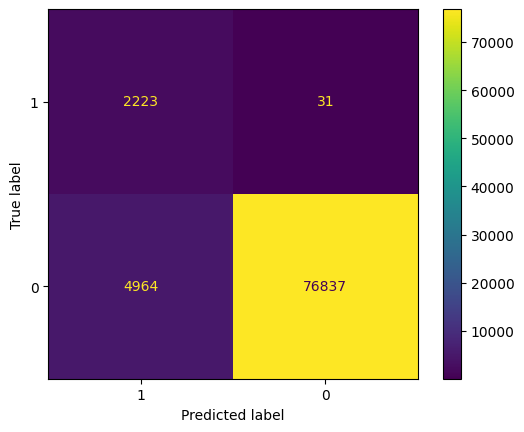

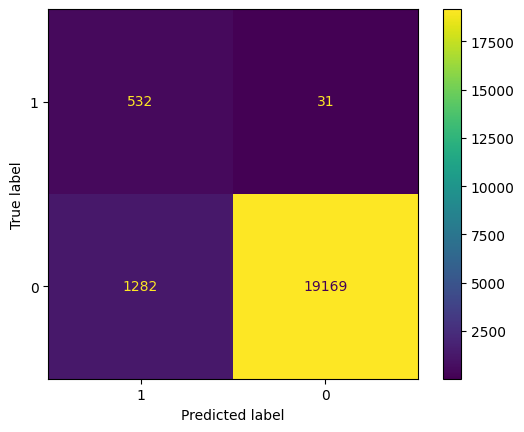

In [ ]:
tree_f10_opt = plant_tree("tree_f10_opt", max_depth=11, min_samples_leaf=31)

GS optimizing for Recall alone

In [ ]:
recall_opt_grid = {
    'max_depth': [5, 6, 7, 8, 9],
    'min_samples_leaf': np.arange(20, 35, 1)
}

DT_recall_opt = GridSearchCV(DT_pref, recall_opt_grid, scoring='recall', verbose=1)
DT_recall_opt.fit(X2_train, y_train)
DT_recall_opt.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


{'max_depth': 7, 'min_samples_leaf': 31}

when optimizing for Recall, GS recommends, on first run:

{'max_depth': 7, 'min_samples_leaf': 29}

on second run (more reliable):

{'max_depth': 7, 'min_samples_leaf': 31}

Results for tree_recall_opt
   On Training Data:
     Accuracy: % 92.073
     Precision: % 24.809
     Recall: % 96.318
     F4 Score: % 82.354
     F10 Score: % 93.645
   On Validation Data:
     Accuracy: % 91.934
     Precision: % 24.389
     Recall: % 95.737
     F4 Score: % 74.069
     F10 Score: % 93.042

   Generalization Losses:
     Accuracy: % 0.139
     Precision: % 0.419
     Recall: % 0.581
     F4: % 0.673
     F10: % 0.603

   Confusion Matrices

     Training:
[[ 2171    83]
 [ 6580 75221]]

     Validation:
[[  539    24]
 [ 1671 18780]]


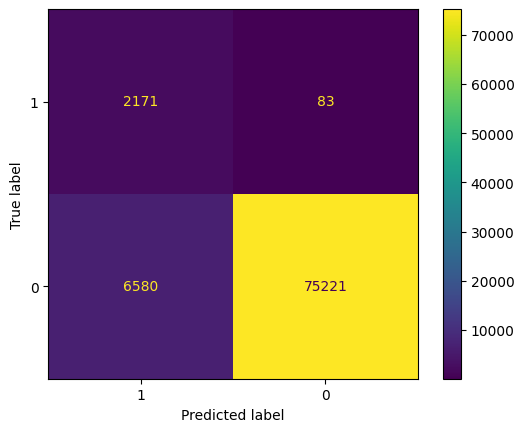

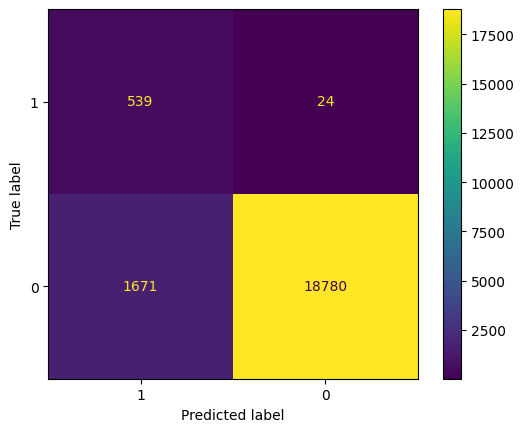

In [ ]:
tree_recall_opt = plant_tree("tree_recall_opt", max_depth=7, min_samples_leaf=31)

### 9. Assess Model Performance

In [ ]:
val_FNs = []
val_FPs = []

for cm in cm_val_list:
  val_FNs.append(cm[0][1])
  val_FPs.append(cm[1][0])

- class weights missing one entry
- f2 losses and f3 losses lists are empty

In [ ]:
DT_eval = pd.DataFrame({
    'Model': model_names_list,
    'Max Depth': max_depth_list,
    'Depth': depth_list,
    'Min Samples Leaf': min_samples_leaf_list,
    'Max Features': max_features_list,
    'Class Weight': class_weights,
    'Train Accuracy': training_accuracy_list,
    'Train Precision': training_precision_list,
    'Train Recall': training_recall_list,
    'Train F4': training_f4_list,
    'Train F10': training_f10_list,
    'Validation FNs': val_FNs,
    'Validation FPs': val_FPs,
    'Validation Accuracy': validation_accuracy_list,
    'Validation Precision': validation_precision_list,
    'Validation Recall': validation_recall_list,
    'Validation F4': validation_f4_list,
    'Validation F10': validation_f10_list,
    'Accuracy Generalization Loss': accuracy_losses_list,
    'Precision Generalization Loss': precision_losses_list,
    'Recall Generalization Loss': recall_losses_list,
    'F4 Generalization Loss': f4_losses_list,
    'F10 Generalization Loss': f10_losses_list
    #'F2 Generalization Loss': f2_losses_list,
    #'F3 Generalization Loss': f3_losses_list
})

DT_eval.fillna("None", inplace=True)

In [ ]:
DTs_by_recall = DT_eval.sort_values('Validation Recall', ascending=False)
DTs_by_F4 = DT_eval.sort_values('Validation F4', ascending=False)
DTs_by_F10 = DT_eval.sort_values('Validation F10', ascending=False)
DTs_by_precision = DT_eval.sort_values('Validation Precision', ascending=False)

In [ ]:
DTs_by_recall

,Model,Max Depth,Depth,Min Samples Leaf,Max Features,Class Weight,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
16,tree_recall_opt,7.0,7.0,31.0,None,balanced,0.920730,0.248086,0.963177,0.823541,...,0.919339,0.243891,0.957371,0.816812,0.930422,0.001391,0.004195,0.005805,0.006729,0.006029
10,tree2,5.0,5.0,20.0,None,balanced,0.872726,0.169174,0.957853,0.751710,...,0.869040,0.164572,0.953819,0.743949,0.910582,0.003687,0.004602,0.004034,0.007761,0.005009
11,tree2a,10.0,10.0,20.0,None,balanced,0.942216,0.315049,0.983585,0.874434,...,0.940516,0.304050,0.946714,0.842022,0.927308,0.001701,0.010999,0.036871,0.032412,0.036037
15,tree_f10_opt,11.0,11.0,31.0,None,balanced,0.940575,0.309308,0.986247,0.873760,...,0.937518,0.293275,0.944938,0.835705,0.924596,0.003057,0.016034,0.041309,0.038055,0.040733
9,tree1e,None,17.0,35.0,None,balanced,0.945298,0.328001,0.991571,0.886119,...,0.940325,0.302684,0.941385,0.837438,0.922120,0.004972,0.025317,0.050185,0.048680,0.049979
14,tree3,5.0,5.0,20.0,None,balanced,0.789150,0.109152,0.958296,0.657440,...,0.785000,0.105211,0.936057,0.639152,0.868176,0.004149,0.003941,0.022240,0.018288,0.021587
12,tree2b,15.0,15.0,20.0,None,balanced,0.951603,0.356169,0.996451,0.901156,...,0.947321,0.329146,0.930728,0.840377,0.914185,0.004282,0.027023,0.065723,0.060779,0.064840
6,tree1b,None,18.0,20.0,None,balanced,0.952507,0.360737,0.998669,0.904572,...,0.947939,0.331429,0.927176,0.838515,0.910963,0.004568,0.029309,0.071493,0.066057,0.070521
7,tree1c,None,17.0,50.0,None,balanced,0.938160,0.300920,0.987134,0.870381,...,0.935614,0.284389,0.925400,0.817066,0.905199,0.002545,0.016531,0.061734,0.053314,0.060140
8,tree1d,None,19.0,15.0,None,balanced,0.963226,0.421703,1.000000,0.925354,...,0.957457,0.377679,0.907638,0.838433,0.895201,0.005770,0.044023,0.092362,0.086922,0.091404


In [ ]:
DTs_by_F4

,Model,Max Depth,Depth,Min Samples Leaf,Max Features,Class Weight,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
11,tree2a,10.0,10.0,20.0,None,balanced,0.942216,0.315049,0.983585,0.874434,...,0.940516,0.304050,0.946714,0.842022,0.927308,0.001701,0.010999,0.036871,0.032412,0.036037
12,tree2b,15.0,15.0,20.0,None,balanced,0.951603,0.356169,0.996451,0.901156,...,0.947321,0.329146,0.930728,0.840377,0.914185,0.004282,0.027023,0.065723,0.060779,0.064840
6,tree1b,None,18.0,20.0,None,balanced,0.952507,0.360737,0.998669,0.904572,...,0.947939,0.331429,0.927176,0.838515,0.910963,0.004568,0.029309,0.071493,0.066057,0.070521
8,tree1d,None,19.0,15.0,None,balanced,0.963226,0.421703,1.000000,0.925354,...,0.957457,0.377679,0.907638,0.838433,0.895201,0.005770,0.044023,0.092362,0.086922,0.091404
9,tree1e,None,17.0,35.0,None,balanced,0.945298,0.328001,0.991571,0.886119,...,0.940325,0.302684,0.941385,0.837438,0.922120,0.004972,0.025317,0.050185,0.048680,0.049979
5,tree1a,None,20.0,10.0,None,balanced,0.973196,0.500111,1.000000,0.944468,...,0.968116,0.451408,0.882771,0.835790,0.874497,0.005080,0.048703,0.117229,0.108678,0.115703
15,tree_f10_opt,11.0,11.0,31.0,None,balanced,0.940575,0.309308,0.986247,0.873760,...,0.937518,0.293275,0.944938,0.835705,0.924596,0.003057,0.016034,0.041309,0.038055,0.040733
3,tree1,None,23.0,5.0,None,balanced,0.986675,0.668050,1.000000,0.971601,...,0.980061,0.587591,0.857904,0.835300,0.854014,0.006614,0.080459,0.142096,0.136301,0.141090
4,tree1_gini,None,24.0,5.0,None,balanced,0.986307,0.661968,1.000000,0.970838,...,0.979300,0.577295,0.849023,0.826149,0.845085,0.007007,0.084673,0.150977,0.144689,0.149885
7,tree1c,None,17.0,50.0,None,balanced,0.938160,0.300920,0.987134,0.870381,...,0.935614,0.284389,0.925400,0.817066,0.905199,0.002545,0.016531,0.061734,0.053314,0.060140


In [ ]:
DTs_by_F10

,Model,Max Depth,Depth,Min Samples Leaf,Max Features,Class Weight,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
16,tree_recall_opt,7.0,7.0,31.0,None,balanced,0.920730,0.248086,0.963177,0.823541,...,0.919339,0.243891,0.957371,0.816812,0.930422,0.001391,0.004195,0.005805,0.006729,0.006029
11,tree2a,10.0,10.0,20.0,None,balanced,0.942216,0.315049,0.983585,0.874434,...,0.940516,0.304050,0.946714,0.842022,0.927308,0.001701,0.010999,0.036871,0.032412,0.036037
15,tree_f10_opt,11.0,11.0,31.0,None,balanced,0.940575,0.309308,0.986247,0.873760,...,0.937518,0.293275,0.944938,0.835705,0.924596,0.003057,0.016034,0.041309,0.038055,0.040733
9,tree1e,None,17.0,35.0,None,balanced,0.945298,0.328001,0.991571,0.886119,...,0.940325,0.302684,0.941385,0.837438,0.922120,0.004972,0.025317,0.050185,0.048680,0.049979
12,tree2b,15.0,15.0,20.0,None,balanced,0.951603,0.356169,0.996451,0.901156,...,0.947321,0.329146,0.930728,0.840377,0.914185,0.004282,0.027023,0.065723,0.060779,0.064840
6,tree1b,None,18.0,20.0,None,balanced,0.952507,0.360737,0.998669,0.904572,...,0.947939,0.331429,0.927176,0.838515,0.910963,0.004568,0.029309,0.071493,0.066057,0.070521
10,tree2,5.0,5.0,20.0,None,balanced,0.872726,0.169174,0.957853,0.751710,...,0.869040,0.164572,0.953819,0.743949,0.910582,0.003687,0.004602,0.004034,0.007761,0.005009
7,tree1c,None,17.0,50.0,None,balanced,0.938160,0.300920,0.987134,0.870381,...,0.935614,0.284389,0.925400,0.817066,0.905199,0.002545,0.016531,0.061734,0.053314,0.060140
8,tree1d,None,19.0,15.0,None,balanced,0.963226,0.421703,1.000000,0.925354,...,0.957457,0.377679,0.907638,0.838433,0.895201,0.005770,0.044023,0.092362,0.086922,0.091404
5,tree1a,None,20.0,10.0,None,balanced,0.973196,0.500111,1.000000,0.944468,...,0.968116,0.451408,0.882771,0.835790,0.874497,0.005080,0.048703,0.117229,0.108678,0.115703


In [ ]:
DTs_by_precision

,Model,Max Depth,Depth,Min Samples Leaf,Max Features,Class Weight,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
2,balanced_tree,None,27.0,1.0,None,balanced,0.999929,0.997345,1.000000,0.999843,...,0.987627,0.791908,0.730018,0.733389,0.730583,0.012301,0.205438,0.269982,0.266454,0.269391
1,tree_def,None,25.0,1.0,None,None,0.999952,1.000000,0.998225,0.998330,...,0.987199,0.753448,0.776199,0.774823,0.775967,0.012753,0.246552,0.222026,0.223507,0.222276
3,tree1,None,23.0,5.0,None,balanced,0.986675,0.668050,1.000000,0.971601,...,0.980061,0.587591,0.857904,0.835300,0.854014,0.006614,0.080459,0.142096,0.136301,0.141090
4,tree1_gini,None,24.0,5.0,None,balanced,0.986307,0.661968,1.000000,0.970838,...,0.979300,0.577295,0.849023,0.826149,0.845085,0.007007,0.084673,0.150977,0.144689,0.149885
5,tree1a,None,20.0,10.0,None,balanced,0.973196,0.500111,1.000000,0.944468,...,0.968116,0.451408,0.882771,0.835790,0.874497,0.005080,0.048703,0.117229,0.108678,0.115703
8,tree1d,None,19.0,15.0,None,balanced,0.963226,0.421703,1.000000,0.925354,...,0.957457,0.377679,0.907638,0.838433,0.895201,0.005770,0.044023,0.092362,0.086922,0.091404
6,tree1b,None,18.0,20.0,None,balanced,0.952507,0.360737,0.998669,0.904572,...,0.947939,0.331429,0.927176,0.838515,0.910963,0.004568,0.029309,0.071493,0.066057,0.070521
12,tree2b,15.0,15.0,20.0,None,balanced,0.951603,0.356169,0.996451,0.901156,...,0.947321,0.329146,0.930728,0.840377,0.914185,0.004282,0.027023,0.065723,0.060779,0.064840
11,tree2a,10.0,10.0,20.0,None,balanced,0.942216,0.315049,0.983585,0.874434,...,0.940516,0.304050,0.946714,0.842022,0.927308,0.001701,0.010999,0.036871,0.032412,0.036037
9,tree1e,None,17.0,35.0,None,balanced,0.945298,0.328001,0.991571,0.886119,...,0.940325,0.302684,0.941385,0.837438,0.922120,0.004972,0.025317,0.050185,0.048680,0.049979


In [ ]:
DTs_by_recall.to_csv("DTs_by_recall")
DTs_by_precision.to_csv("DTs_by_precision")
DTs_by_F4.to_csv("DTs_by_F4")
DTs_by_F10.to_csv("DTs_by_F10")

Testing Phase

In [ ]:
# test metrics
tested_models = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f4_list = []
test_f10_list = []
accuracy_generalization = []
precision_generalization = []
recall_generalization = []
f4_generalization = []
f10_generalization = []
test_cms = []

Testing tree2a

Test Results for tree2a
     Accuracy:  0.945066240292371
     Precision:  0.32227032227032226
     Recall:  0.9517045454545454
     F4:  0.8536311174398561
     F10:  0.9336497468232177

Confusion matrix
[[24155  1409]
 [   34   670]]

Error generalization
     Accuracy:  0.0028498343676788274
     Precision:  0.007221295696498209
     Recall:  -0.0318801927885779
     F4 Score:  -0.020803350437919477
     F10 Score:  -0.02969515953850621



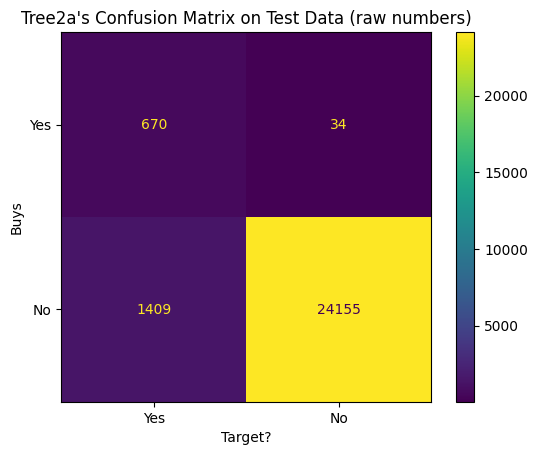

In [ ]:
results_tree2a = DT_eval.loc[DT_eval['Model'] == "tree2a"][[
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F4', 'Train F10',
    'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F4', 'Validation F10']]

preds_tree2a_test = tree2a.predict(X2_test)
accuracy_tree2a_test = accuracy_score(y_test, preds_tree2a_test)
precision_tree2a_test = precision_score(y_test, preds_tree2a_test)
recall_tree2a_test = recall_score(y_test, preds_tree2a_test)
f4_tree2a_test = fbeta_score(y_test, preds_tree2a_test, beta=4)
f10_tree2a_test = fbeta_score(y_test, preds_tree2a_test, beta=10)
cm_tree2a_test = confusion_matrix(y_test, preds_tree2a_test)

# generalization comparison
accuracy_generalization_tree2a = (results_tree2a['Train Accuracy'].iloc[0] - accuracy_tree2a_test) * -1
precision_generalization_tree2a = (results_tree2a['Train Precision'].iloc[0] - precision_tree2a_test) * -1
recall_generalization_tree2a = (results_tree2a['Train Recall'].iloc[0] - recall_tree2a_test) * -1
F4_generalization_tree2a = (results_tree2a['Train F4'].iloc[0] - f4_tree2a_test) * -1
F10_generalization_tree2a = (results_tree2a['Train F10'].iloc[0] - f10_tree2a_test) * -1

# appending info to lists
tested_models.append("tree2a")
test_accuracy_list.append(accuracy_tree2a_test)
test_precision_list.append(precision_tree2a_test)
test_recall_list.append(recall_tree2a_test)
test_f4_list.append(f4_tree2a_test)
test_f10_list.append(f10_tree2a_test)
test_cms.append(cm_tree2a_test)

# print results
print("Test Results for tree2a")
print("     Accuracy: ", accuracy_tree2a_test)
print("     Precision: ", precision_tree2a_test)
print("     Recall: ", recall_tree2a_test)
print("     F4: ", f4_tree2a_test)
print("     F10: ", f10_tree2a_test)
print("")
print("Confusion matrix")
print(cm_tree2a_test)
print("")
print("Error generalization")
print("     Accuracy: ", accuracy_generalization_tree2a)
print("     Precision: ", precision_generalization_tree2a)
print("     Recall: ", recall_generalization_tree2a)
print("     F4 Score: ", F4_generalization_tree2a)
print("     F10 Score: ", F10_generalization_tree2a)
print("")
# raw numbers
CM_fig_tree2a_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, labels=[1, 0])
configure_CM(CM_fig_tree2a_raw, "Tree2a's Confusion Matrix on Test Data (raw numbers)")
plt.show()

normalized over true classes

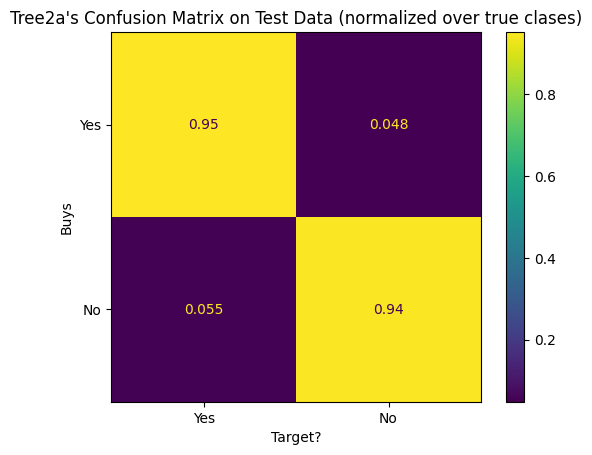

In [ ]:
cm_fig_tree2a_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, normalize='true', labels=[1, 0])
configure_CM(cm_fig_tree2a_true, "Tree2a's Confusion Matrix on Test Data (normalized over true clases)")
plt.show()

normalized over predictions

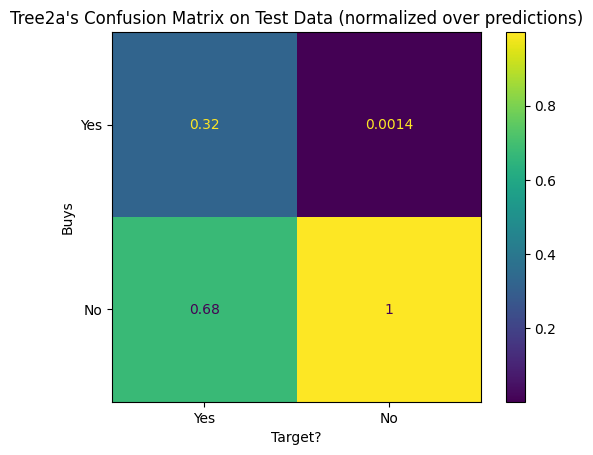

In [ ]:
cm_fig_tree2a_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, normalize='pred', labels=[1, 0])
configure_CM(cm_fig_tree2a_pred, "Tree2a's Confusion Matrix on Test Data (normalized over predictions)")
plt.show()

Testing tree_recall_opt

In [ ]:
results_tree_recall_opt = DT_eval.loc[DT_eval['Model'] == "tree_recall_opt"][[
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F4', 'Train F10',
    'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F4', 'Validation F10']]

preds_tree_recall_opt_test = tree_recall_opt.predict(X2_test)
accuracy_tree_recall_opt_test = accuracy_score(y_test, preds_tree_recall_opt_test)
precision_tree_recall_opt_test = precision_score(y_test, preds_tree_recall_opt_test)
recall_tree_recall_opt_test = recall_score(y_test, preds_tree_recall_opt_test)
f4_tree_recall_opt_test = fbeta_score(y_test, preds_tree_recall_opt_test, beta=4)
f10_tree_recall_opt_test = fbeta_score(y_test, preds_tree_recall_opt_test, beta=10)
cm_tree_recall_opt_test = confusion_matrix(y_test, preds_tree_recall_opt_test)

# generalization comparison
accuracy_generalization_tree_recall_opt = (results_tree_recall_opt['Train Accuracy'].iloc[0] - accuracy_tree_recall_opt_test) * -1
precision_generalization_tree_recall_opt = (results_tree_recall_opt['Train Precision'].iloc[0] - precision_tree_recall_opt_test) * -1
recall_generalization_tree_recall_opt = (results_tree_recall_opt['Train Recall'].iloc[0] - recall_tree_recall_opt_test) * -1
F4_generalization_tree_recall_opt = (results_tree_recall_opt['Train F4'].iloc[0] - f4_tree_recall_opt_test) * -1
F10_generalization_tree_recall_opt = (results_tree_recall_opt['Train F10'].iloc[0] - f10_tree_recall_opt_test) * -1

# appending info to lists
tested_models.append("tree_recall_opt")
test_accuracy_list.append(accuracy_tree_recall_opt_test)
test_precision_list.append(precision_tree_recall_opt_test)
test_recall_list.append(recall_tree_recall_opt_test)
test_f4_list.append(f4_tree_recall_opt_test)
test_f10_list.append(f10_tree_recall_opt_test)
test_cms.append(cm_tree_recall_opt_test)

# print results
print("Test Results for tree_recall_opt")
print("     Accuracy: ", accuracy_tree_recall_opt_test)
print("     Precision: ", precision_tree_recall_opt_test)
print("     Recall: ", recall_tree_recall_opt_test)
print("     F4: ", f4_tree_recall_opt_test)
print("     F10: ", f10_tree_recall_opt_test)
print("")
print("Confusion matrix")
print(cm_tree_recall_opt_test)
print("")
print("Error generalization")
print("     Accuracy: ", accuracy_generalization_tree_recall_opt)
print("     Precision: ", precision_generalization_tree_recall_opt)
print("     Recall: ", recall_generalization_tree_recall_opt)
print("     F4 Score: ", F4_generalization_tree_recall_opt)
print("     F10 Score: ", F10_generalization_tree_recall_opt)
print("")

Test Results for tree_recall_opt
     Accuracy:  0.9224151058321912
     Precision:  0.25149031296572283
     Recall:  0.9588068181818182
     F4:  0.8226985947806138
     F10:  0.9328307153412514

Confusion matrix
[[23555  2009]
 [   29   675]]

Error generalization
     Accuracy:  0.0016846317378482745
     Precision:  0.003404379929498408
     Recall:  -0.004369756795998936
     F4 Score:  -0.0008426302556464593
     F10 Score:  -0.0036205490138013774



raw numbers

In [ ]:
cm_fig_tree_recall_opt_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_raw, "Tree_recall_opt's Test Confusion Matrix in raw numbers")
plt.show()

normalized over actuals

In [ ]:
cm_fig_tree_recall_opt_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, normalize='true', labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_true, "Tree_recall_opt's Test Confusion Matrix normalized over true classes")
plt.show()

normalized over predictions

In [ ]:
cm_fig_tree_recall_opt_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, normalize='pred', labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_pred, "Tree_recall_opt's Test Confusion Matrix normalized over predictions")
plt.show()

Testing tree_f10_opt

In [ ]:
results_tree_f10_opt = DT_eval.loc[DT_eval['Model'] == "tree_f10_opt"][[
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F4', 'Train F10',
    'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F4', 'Validation F10']]

preds_tree_f10_opt_test = tree_f10_opt.predict(X2_test)
accuracy_tree_f10_opt_test = accuracy_score(y_test, preds_tree_f10_opt_test)
precision_tree_f10_opt_test = precision_score(y_test, preds_tree_f10_opt_test)
recall_tree_f10_opt_test = recall_score(y_test, preds_tree_f10_opt_test)
f4_tree_f10_opt_test = fbeta_score(y_test, preds_tree_f10_opt_test, beta=4)
f10_tree_f10_opt_test = fbeta_score(y_test, preds_tree_f10_opt_test, beta=10)
cm_tree_f10_opt_test = confusion_matrix(y_test, preds_tree_f10_opt_test)

# generalization comparison
accuracy_generalization_tree_f10_opt = (results_tree_f10_opt['Train Accuracy'].iloc[0] - accuracy_tree_f10_opt_test) * -1
precision_generalization_tree_f10_opt = (results_tree_f10_opt['Train Precision'].iloc[0] - precision_tree_f10_opt_test) * -1
recall_generalization_tree_f10_opt = (results_tree_f10_opt['Train Recall'].iloc[0] - recall_tree_f10_opt_test) * -1
F4_generalization_tree_f10_opt = (results_tree_f10_opt['Train F4'].iloc[0] - f4_tree_f10_opt_test) * -1
F10_generalization_tree_f10_opt = (results_tree_f10_opt['Train F10'].iloc[0] - f10_tree_f10_opt_test) * -1

# appending info to lists
tested_models.append("tree_f10_opt")
test_accuracy_list.append(accuracy_tree_f10_opt_test)
test_precision_list.append(precision_tree_f10_opt_test)
test_recall_list.append(recall_tree_f10_opt_test)
test_f4_list.append(f4_tree_f10_opt_test)
test_f10_list.append(f10_tree_f10_opt_test)
test_cms.append(cm_tree_f10_opt_test)

# print results
print("Test Results for tree_f10_opt")
print("     Accuracy: ", accuracy_tree_f10_opt_test)
print("     Precision: ", precision_tree_f10_opt_test)
print("     Recall: ", recall_tree_f10_opt_test)
print("     F4: ", f4_tree_f10_opt_test)
print("     F10: ", f10_tree_f10_opt_test)
print("")
print("Confusion matrix")
print(cm_tree_f10_opt_test)
print("")
print("Error generalization")
print("     Accuracy: ", accuracy_generalization_tree_f10_opt)
print("     Precision: ", precision_generalization_tree_f10_opt)
print("     Recall: ", recall_generalization_tree_f10_opt)
print("     F4 Score: ", F4_generalization_tree_f10_opt)
print("     F10 Score: ", F10_generalization_tree_f10_opt)
print("")

Test Results for tree_f10_opt
     Accuracy:  0.9419065022080098
     Precision:  0.30954587581093607
     Recall:  0.9488636363636364
     F4:  0.8460736104902399
     F10:  0.9298492240690206

Confusion matrix
[[24074  1490]
 [   36   668]]

Error generalization
     Accuracy:  0.0013318784497562408
     Precision:  0.00023740217798767782
     Recall:  -0.03738303621843997
     F4 Score:  -0.027686533783880973
     F10 Score:  -0.03547987858933954



Comparison

In [ ]:
figures = [test_recall_list, test_precision_list, test_accuracy_list, test_f4_list, test_f10_list]
for f in figures:
  for x in f:
    x = (x * 100).round(2)

DTs_test_comparison = pd.DataFrame({
    'Model': tested_models,
    'Recall': test_recall_list,
    'Precision': test_precision_list,
    'Accuracy': test_accuracy_list,
    'F4 Score': test_f4_list,
    'F10 Score': test_f10_list,
})
DTs_by_recall = DTs_test_comparison.sort_values('Recall', ascending=False)
DTs_by_F10 = DTs_test_comparison.sort_values('F10 Score', ascending=False)

In [ ]:
DTs_by_recall.to_csv("Top DTs by Recall")
DTs_by_F10.to_csv("Top DTs by F10 Score")

In [ ]:
DTs_by_recall

,Model,Recall,Precision,Accuracy,F4 Score,F10 Score
1,tree_recall_opt,0.958807,0.251490,0.922415,0.822699,0.932831
0,tree2a,0.951705,0.322270,0.945066,0.853631,0.933650
2,tree_f10_opt,0.948864,0.309546,0.941907,0.846074,0.929849


In [ ]:
DTs_by_F10

,Model,Recall,Precision,Accuracy,F4 Score,F10 Score
0,tree2a,0.951705,0.322270,0.945066,0.853631,0.933650
1,tree_recall_opt,0.958807,0.251490,0.922415,0.822699,0.932831
2,tree_f10_opt,0.948864,0.309546,0.941907,0.846074,0.929849


Analyzing tree2a's decision structure

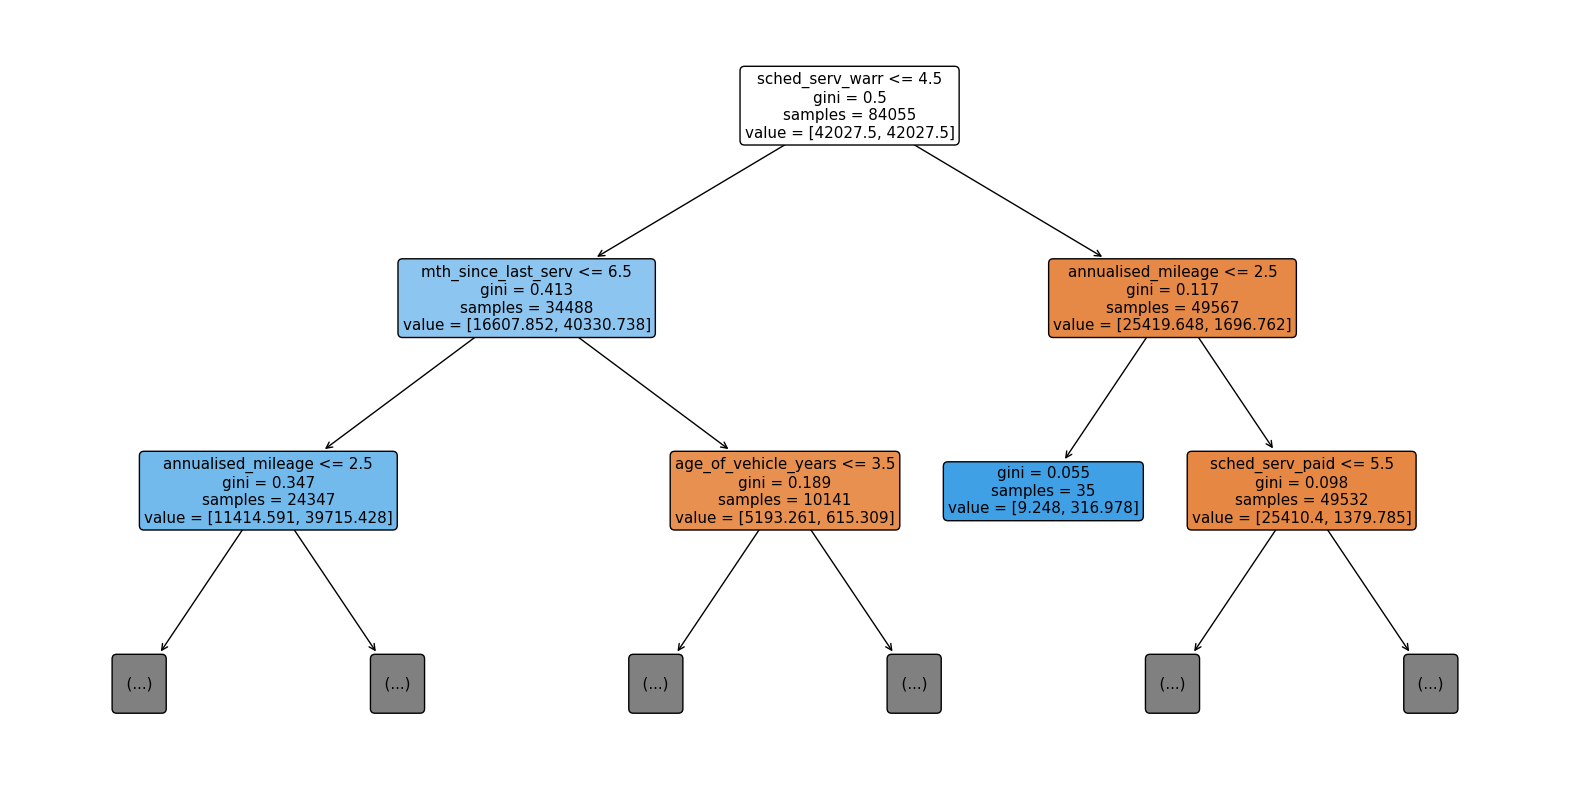

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree2a, max_depth=2, filled=True, rounded=True, feature_names=X2_test.columns)
plt.show()